In [145]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [146]:
from sklearn.preprocessing import scale 
from sklearn import cross_validation 
from sklearn.linear_model import LinearRegression 
from sklearn.cross_decomposition import PLSRegression, PLSSVD 
from sklearn.metrics import mean_squared_error

In [147]:
df = pd.read_csv("C:/Users/KAGOWTH/Documents/Python Projects/Hitters.csv").dropna()

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [149]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [150]:
y = df.Salary
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

In [151]:
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [170]:
X_train, X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state = 1)

In [171]:
 n = len(X_train)

In [172]:
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

In [173]:
mse = []
for i in np.arange(1, 20): 
    pls = PLSRegression(n_components=i) 
    score = cross_validation.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean() 
    mse.append(-score)


(-1, 19.9)

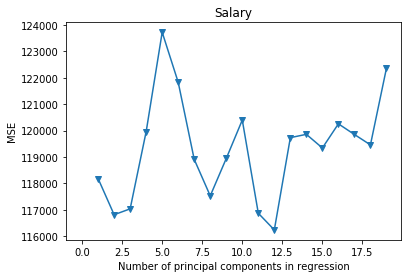

In [174]:
plt.plot(np.arange(1, 20), np.array(mse),'-v') 
plt.xlabel('Number of principal components in regression') 
plt.ylabel('MSE') 
plt.title('Salary') 
plt.xlim(xmin=-1)

In [167]:
pls = PLSRegression(n_components=18)
pls.fit((X_train), y_train)

PLSRegression(copy=True, max_iter=500, n_components=18, scale=True, tol=1e-06)

In [168]:
mean_squared_error(y_test, pls.predict((X_test)))

124759.84474681926